In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Прочитайте csv файл (використовуйте функцію read_csv).

In [21]:
df = pd.read_csv("bestsellers with categories.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Виведіть перші п'ять рядків (використовується функція head).

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape).

In [4]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет?

In [5]:
df["Name"].nunique()

351

Для кожної з книг доступні 7 змінних (колонок). Давайте розглянемо їх детальніше:
Name - назва книги;
Author - автор;
User Rating - рейтинг (за 5-бальною шкалою);
Reviews - кількість відгуків;
Price - ціна (у доларах станом на 2020 рік);
Year - рік, коли книга потрапила до рейтингу Топ-50;
Genre - жанр.

Для спрощення подальшої роботи давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту).

In [32]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum). Чи є в якихось змінних пропуски? Hі

In [8]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique).

In [10]:
print(pd.unique(df["genre"]))

['Non Fiction' 'Fiction']


Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist').

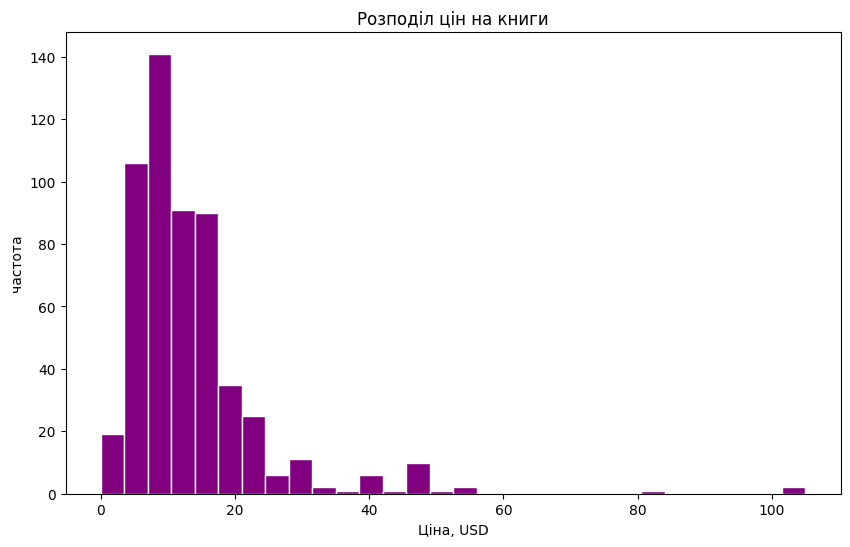

In [18]:
df["price"].plot(
    kind="hist", bins=30, color="purple", edgecolor="white", figsize=(10, 6)
)
plt.title("Розподіл цін на книги")
plt.xlabel("Ціна, USD")
plt.ylabel("частота")
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median).

In [20]:
print(f"Максимальна ціна: {df['price'].max()}")
print(f"Мінімальна ціна :   {df['price'].min()}")
print(f"Середня ціна    :  {df['price'].mean()}")
print(f"Медіанна ціна   :  {df['price'].median()}")

Максимальна ціна: 105
Мінімальна ціна :   0
Середня ціна    :  13.1
Медіанна ціна   :  11.0


### Пошук та сортування даних

Який рейтинг у датасеті найвищий? 

In [21]:
max_rating = df["user_rating"].max()
max_rating

np.float64(4.9)

Скільки книг мають такий рейтинг? 

In [24]:
count_max_rating = df[df['user_rating'] == max_rating]['name'].unique().size
count_max_rating

28

Яка книга має найбільше відгуків? 

In [25]:
df[df["reviews"] == df["reviews"].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 

In [26]:
top_2015 = df[(df["year"] == 2015)]
top_2015[top_2015["price"] == top_2015["price"].max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 

In [27]:
top_50_2010 = df[(df["year"] == 2010) & (df["genre"] == "Fiction")]
len(top_50_2010)

20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 

In [29]:
df[((df.year == 2010) | (df.year == 2011)) & (df.user_rating == 4.9)].shape[0]

1

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values). Яка книга остання у відсортованому списку? Old School (Diary of a Wimpy Kid #10)

In [32]:
books_sort2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by=['price', 'user_rating'], ascending=True)
books_sort2015

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction


### Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам.

In [33]:
df[["genre", "price"]].groupby("genre").agg(["min", "max"])

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні.

In [38]:
new_df = df.groupby('author')['name'].agg(['count'])
new_df

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Якої розмірності вийшла таблиця?

In [40]:
new_df.size

248

Який автор має найбільше книг? 

In [43]:
most_books_author = new_df['count'].idxmax()
most_books_author

'Jeff Kinney'

Скільки книг цього автора?

In [50]:
new_df.loc[new_df.idxmax()]

,count
author,
Jeff Kinney,12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні.

In [53]:
new_df2 = df.groupby("author").agg({"user_rating": "mean"})
new_df2


,user_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


Який у цього автора середній рейтинг?
У якого автора середній рейтинг мінімальний? 

In [54]:
new_df2.loc[new_df2.idxmin()]

,user_rating
author,
Donna Tartt,3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну.

In [55]:
df_concat = pd.concat([new_df, new_df2], axis=1)
df_concat.columns = ["count", "avg_rating"]
df_concat

,count,avg_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values).

In [56]:
df_concat.sort_values(['count', 'avg_rating'], ascending=True,  inplace=True)
df_concat

,count,avg_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Який автор перший у списку?

In [58]:
df_concat.head(1)

,count,avg_rating
author,,
Muriel Barbery,1,4.0


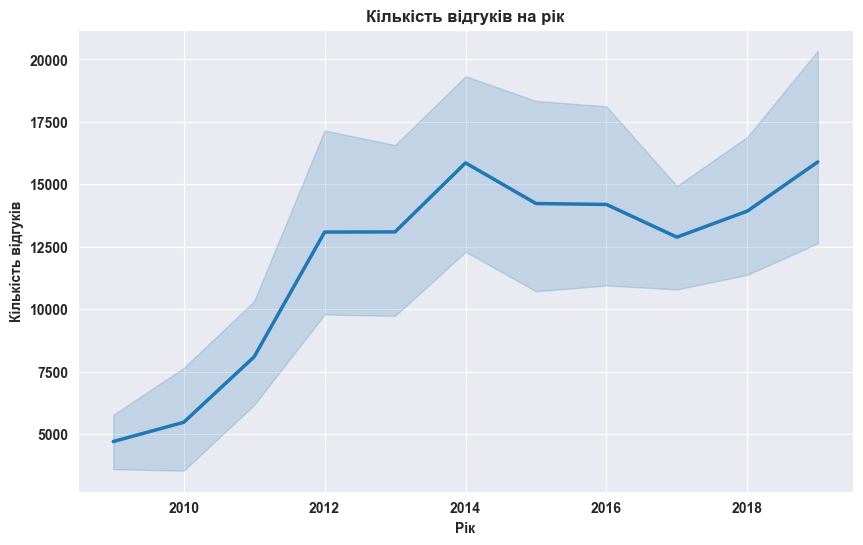

In [60]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='reviews', data=df, linewidth=2.5)
plt.xlabel("Рік", fontweight='bold')
plt.ylabel("Кількість відгуків", fontweight='bold')
plt.title("Кількість відгуків на рік", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

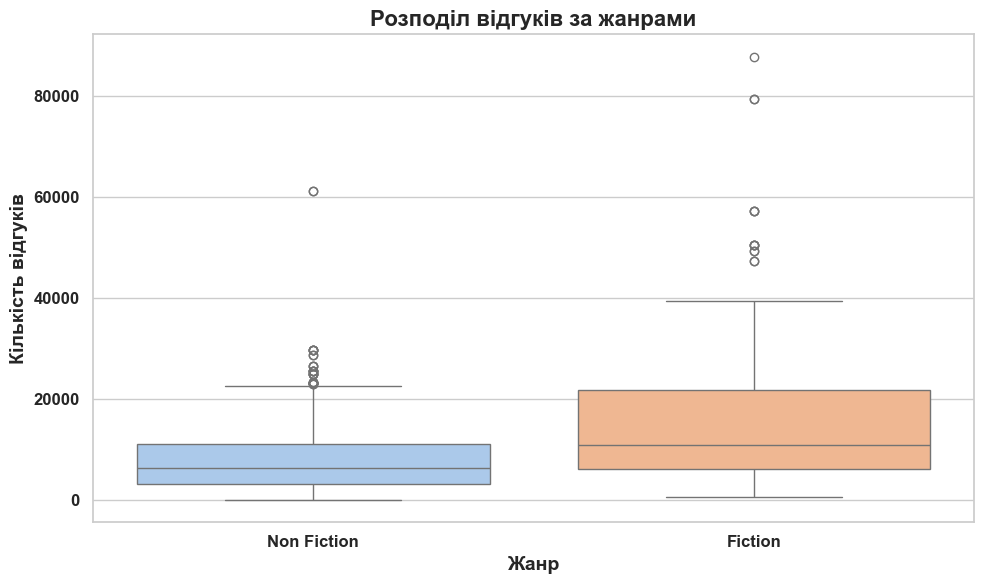

In [61]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='reviews', data=df, palette='pastel', hue='genre', legend=False)
plt.title('Розподіл відгуків за жанрами', fontsize=16, fontweight='bold')
plt.xlabel('Жанр', fontsize=14, fontweight='bold')
plt.ylabel('Кількість відгуків', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

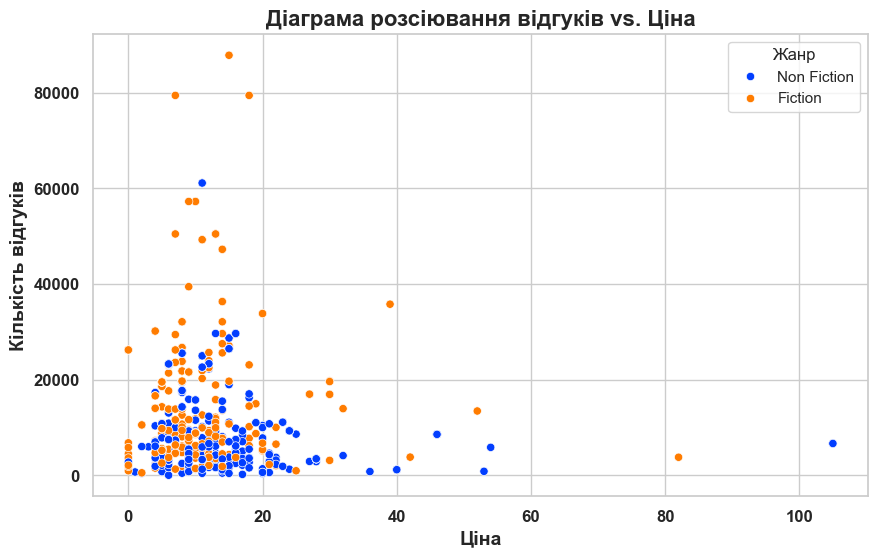

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews', data=df, hue='genre', palette='bright')
plt.title('Діаграма розсіювання відгуків vs. Ціна', fontsize=16, fontweight='bold')
plt.xlabel('Ціна', fontsize=14, fontweight='bold')
plt.ylabel('Кількість відгуків', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(title='Жанр')
plt.show()

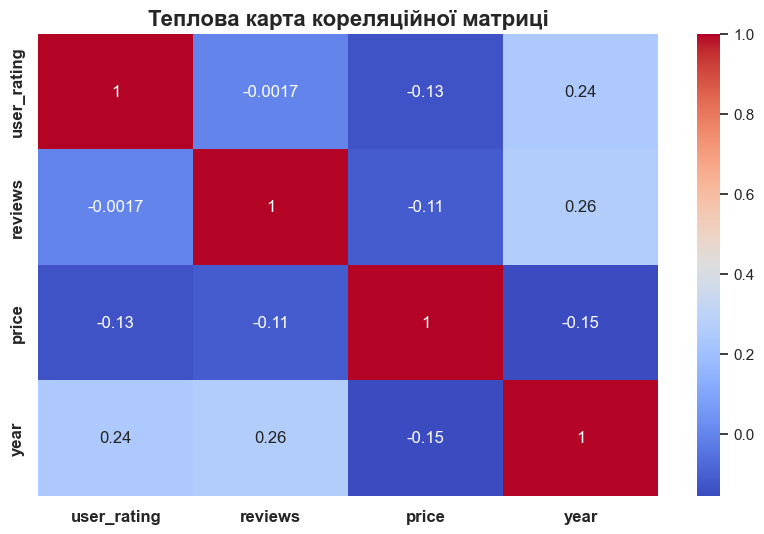

In [63]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Теплова карта кореляційної матриці', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()